In [74]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import csv
import datetime
import gsw
import glob
import matplotlib as mpl
import matplotlib.cm as cm
#import matplotlib.colormaps as cmaps
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mpl_toolkits.axes_grid1.inset_locator as inset_axes
import numpy as np
from numpy import linspace
import os
import pandas as pd
#import rasterio.plot
import scipy.io
#import seaborn as sns
import seawater
import seawater.eos80 as sw
import xarray as xr
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
from shapely.geometry import LineString, MultiLineString, Point, Polygon
from shapely.ops import unary_union


mpl.style.use('seaborn-muted')
#mpl.rc('font', family ='Arial')

/tmp/ipykernel_540397/3497992744.py:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn-muted')


In [75]:
#load bathymetry data

# Open the NetCDF file with xarray
#load the surface heat flux file
shflux = xr.open_dataset('../Data/Raw/amery_v2km_tamura+era_shflux.nc', engine='netcdf4')

#load the surface water flux file
swflux = xr.open_dataset('../Data/Raw/amery_v2km_tamura+era_swflux.nc', engine='netcdf4')

#load the lat lon file
grid = xr.open_dataset('../Data/Raw/amery_v2km_v9_grd.nc', engine='netcdf4')


In [3]:
shflux

<xarray.Dataset>
Dimensions:   (shf_time: 365, eta_rho: 750, xi_rho: 900)
Coordinates:
  * shf_time  (shf_time) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    shflux    (shf_time, eta_rho, xi_rho) float64 ...

In [4]:
grid

<xarray.Dataset>
Dimensions:    (eta_rho: 750, xi_rho: 900, eta_psi: 749, xi_psi: 899,
                eta_u: 750, xi_u: 899, eta_v: 749, xi_v: 900)
Dimensions without coordinates: eta_rho, xi_rho, eta_psi, xi_psi, eta_u, xi_u,
                                eta_v, xi_v
Data variables: (12/23)
    spherical  |S1 ...
    xl         int64 ...
    el         int64 ...
    angle      (eta_rho, xi_rho) float64 ...
    pm         (eta_rho, xi_rho) float64 ...
    pn         (eta_rho, xi_rho) float64 ...
    ...         ...
    lon_v      (eta_v, xi_v) float64 ...
    lat_v      (eta_v, xi_v) float64 ...
    mask_rho   (eta_rho, xi_rho) float64 ...
    mask_psi   (eta_psi, xi_psi) float64 ...
    mask_u     (eta_u, xi_u) float64 ...
    mask_v     (eta_v, xi_v) float64 ...
Attributes:
    history:  Thu Oct 12 15:43:27 2023: ncap2 -s spherical="T" ../../frc/amer...
    type:     ROMS grid file
    NCO:      netCDF Operators version 5.0.5 (Homepage = http://nco.sf.net, C...

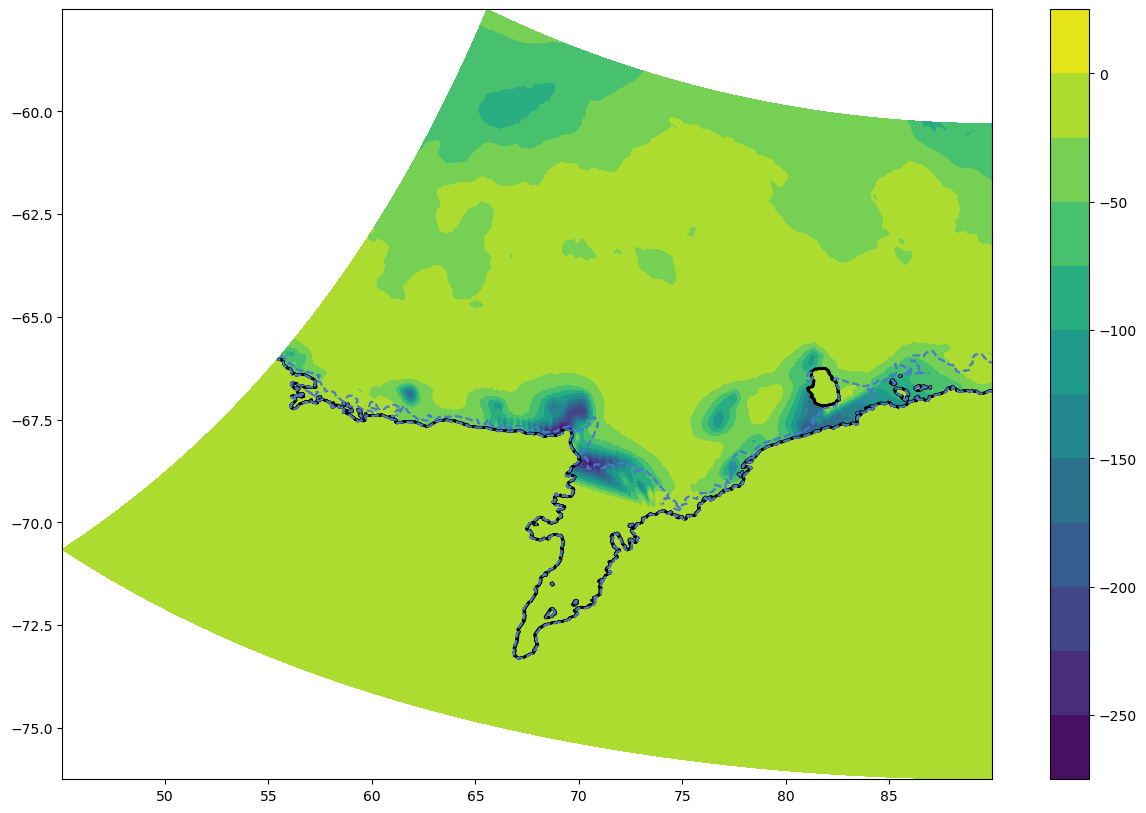

In [3]:
plt.figure(figsize=(15,10))
plt.contourf(grid.lon_rho,grid.lat_rho,grid.mask_rho*shflux.shflux.isel(shf_time=slice(152,334)).mean(dim='shf_time'),levels=10)
plt.colorbar()
plt.contour(grid.lon_rho,grid.lat_rho,grid.mask_rho,colors='k')
plt.contour(grid.lon_rho,grid.lat_rho,grid.zice*grid.mask_rho,levels=(-1,0),colors='C0')


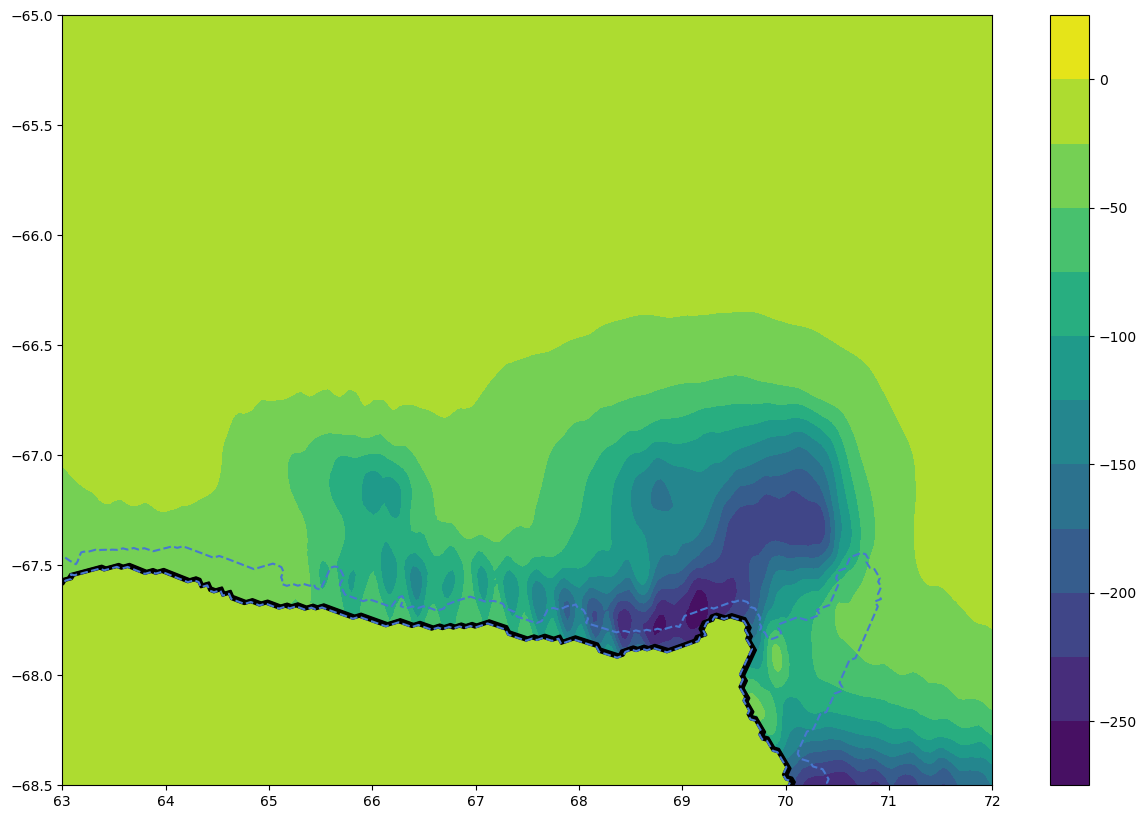

In [65]:
# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min, lon_max, lat_min, lat_max = 63, 72, -68.5, -65

plt.figure(figsize=(15,10))
plt.contourf(grid.lon_rho,grid.lat_rho,grid.mask_rho*shflux.shflux.isel(shf_time=slice(152,334)).mean(dim='shf_time'),levels=10)
plt.colorbar()
plt.contour(grid.lon_rho,grid.lat_rho,grid.mask_rho,colors='k')
plt.contour(grid.lon_rho,grid.lat_rho,grid.zice*grid.mask_rho,levels=(-1,0),colors='C0')

# Set the x and y-axis limits to crop the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

# Show the plot
plt.show()

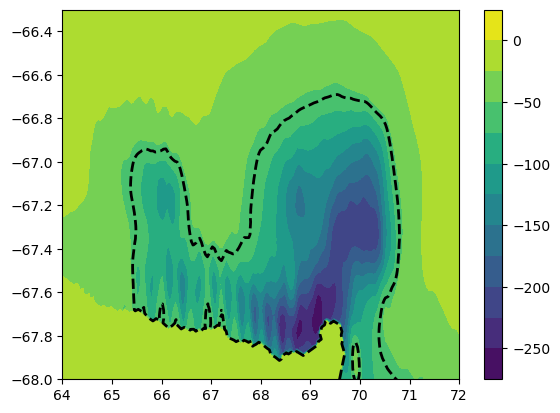

In [66]:
# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min, lon_max, lat_min, lat_max = 64, 72, -68, -66.3


# Specify the desired contour level for the 600m isobath
desired_contour_level = -60


plt.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho * shflux.shflux.isel(shf_time=slice(152, 334)).
             mean(dim='shf_time'), levels=10)
plt.colorbar()

# Extract contour segments within the specified region
contour_line = plt.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho * shflux.shflux.isel(shf_time=slice(152, 334)).mean(dim='shf_time'), 
             levels=[desired_contour_level], colors='black', linewidths=2, extent=(lon_min, lon_max, lat_min, lat_max))

#Set the x and y-axis limits to crop the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

# Show the plot
plt.show()

In [67]:
# Export the coordinates of the contour line
contour_paths = contour_line.collections[0].get_paths()
contour_coordinates_polynya = [path.vertices for path in contour_paths]

# Now, you can use the contour_coordinates in another plot or for further analysis
print("Contour Coordinates:", contour_coordinates_polynya)

Contour Coordinates: [array([[ 89.98189411, -61.45666139],
       [ 89.96400869, -61.45219077],
       [ 89.94570093, -61.4472739 ],
       [ 89.90953727, -61.43644145],
       [ 89.90410572, -61.43482994],
       [ 89.87340773, -61.42438953],
       [ 89.85252291, -61.41744961],
       [ 89.8373172 , -61.41109776],
       [ 89.81023111, -61.4000643 ],
       [ 89.80127585, -61.39582877],
       [ 89.76686018, -61.38266361],
       [ 89.76526178, -61.38204723],
       [ 89.72926579, -61.37008306],
       [ 89.71406601, -61.36522429],
       [ 89.69329619, -61.35855211],
       [ 89.65734723, -61.34777876],
       [ 89.65725624, -61.34775371],
       [ 89.62141266, -61.33799077],
       [ 89.58965386, -61.33021867],
       [ 89.58548825, -61.32921947],
       [ 89.54956567, -61.32172226],
       [ 89.51363717, -61.31566072],
       [ 89.48891495, -61.31250876],
       [ 89.47769589, -61.31109696],
       [ 89.44175704, -61.30698863],
       [ 89.40583041, -61.30280133],
       [ 89.3699

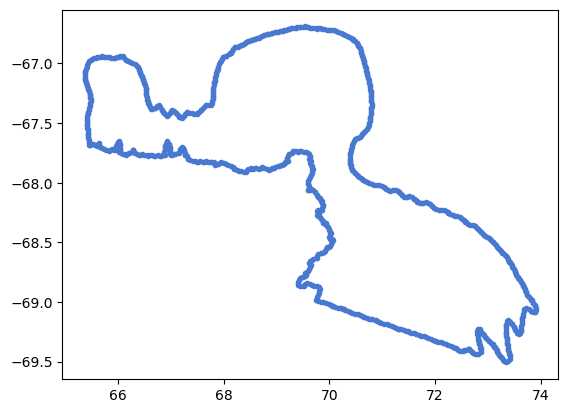

In [68]:
whichCont=17
plt.plot(contour_coordinates_polynya[whichCont][:,0],contour_coordinates_polynya[whichCont][:,1],'.')

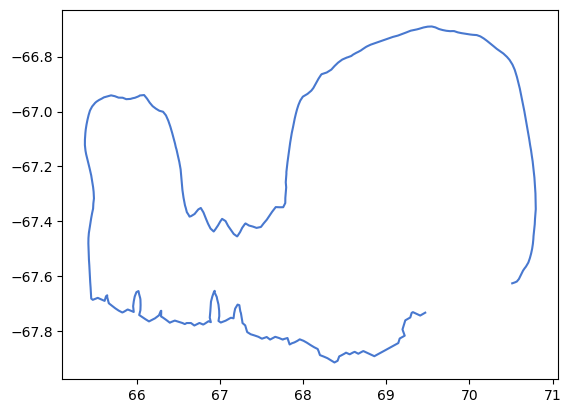

In [72]:
CDpol = contour_coordinates_polynya[17]
CDpol_lon = CDpol[:,0]
CDpol_lat = CDpol[:,1]

remove_these = (((CDpol_lon>69.5) & (CDpol_lat<-67.9)) 
                | ((CDpol_lon>69) & (CDpol_lat<-68.5))
                | ((CDpol_lon>69.5) & (CDpol_lon<70.5) & (CDpol_lat<-67.4)))
                # | ((CDpol_lon>65.5) & (CDpol_lon<70.6) & (CDpol_lat<-67.55)))

CDpol_lon[remove_these]=np.NaN
CDpol_lat[remove_these]=np.NaN

plt.plot(CDpol_lon,CDpol_lat)


In [73]:
# Save to a .npz file
np.savez('../Data/Raw/CDpol_coordinates.npz', lon=CDpol_lon, lat=CDpol_lat)

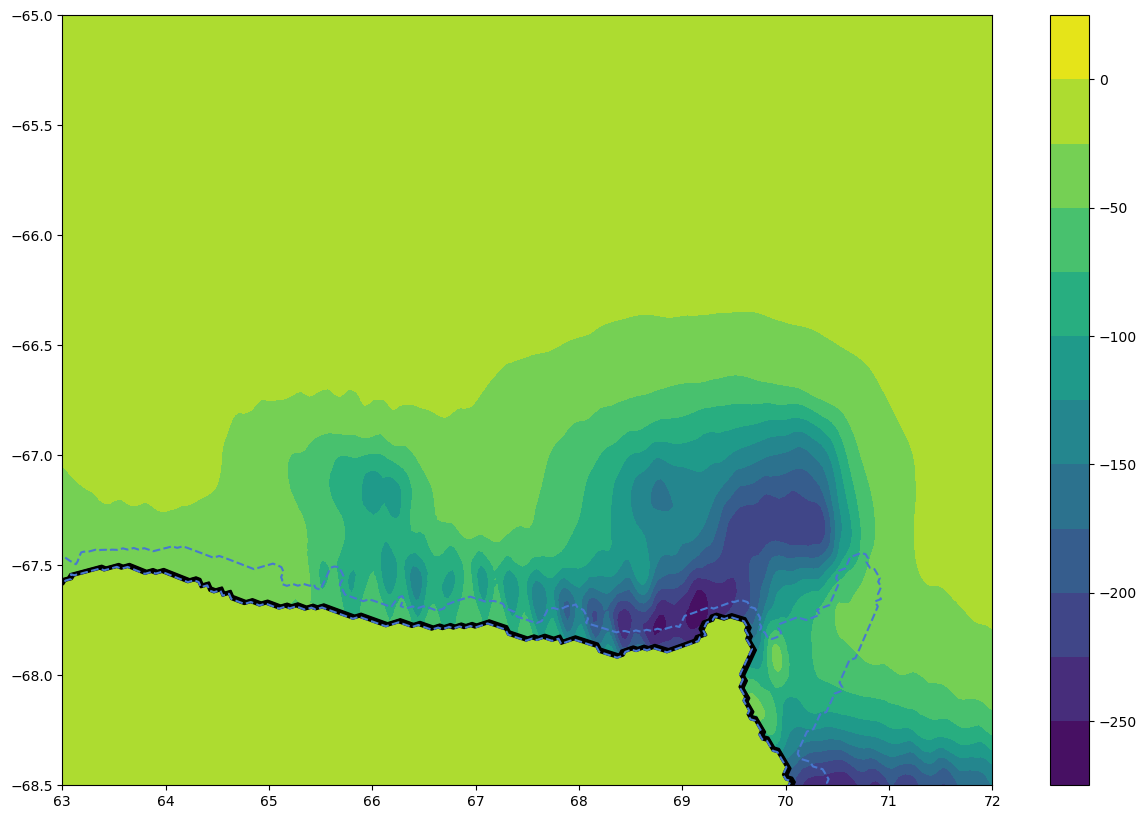

In [39]:
# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min, lon_max, lat_min, lat_max = 63, 72, -68.5, -65

plt.figure(figsize=(15,10))
plt.contourf(grid.lon_rho,grid.lat_rho,grid.mask_rho*shflux.shflux.isel(shf_time=slice(152,334)).mean(dim='shf_time'),levels=10)
plt.colorbar()
plt.contour(grid.lon_rho,grid.lat_rho,grid.mask_rho,colors='k')
plt.contour(grid.lon_rho,grid.lat_rho,grid.zice*grid.mask_rho,levels=(-1,0),colors='C0')

# Set the x and y-axis limits to crop the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

# Show the plot
plt.show()

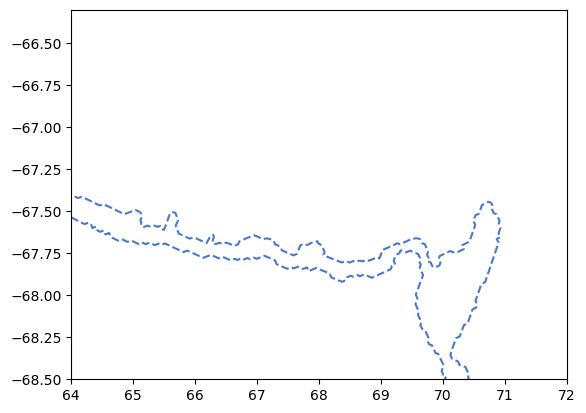

In [116]:
# Define the region where you want to contour (e.g., a bounding box)
# Change these coordinates to match the specific region of interest
lon_min, lon_max, lat_min, lat_max = 64, 72, -68.5, -66.3

contour_line = plt.contour(grid.lon_rho,grid.lat_rho,grid.zice*grid.mask_rho,levels=(-1,0),colors='C0')

#Set the x and y-axis limits to crop the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

# Show the plot
plt.show()

In [117]:
# Export the coordinates of the contour line
contour_paths = contour_line.collections[0].get_paths()
contour_coordinates_polynya = [path.vertices for path in contour_paths]

# Now, you can use the contour_coordinates in another plot or for further analysis
print("Contour Coordinates:", contour_coordinates_polynya)

Contour Coordinates: [array([[ 89.97757552, -66.79383886],
       [ 89.97612206, -66.79433875],
       [ 89.93267414, -66.81144357],
       ...,
       [ 55.46136694, -66.04002893],
       [ 55.45026393, -66.01555676],
       [ 55.45023169, -66.01549352]]), array([[ 55.59620994, -65.92883626],
       [ 55.6293932 , -65.94027015],
       [ 55.63910783, -65.96137006],
       ...,
       [ 89.93470816, -66.108742  ],
       [ 89.96951193, -66.12287169],
       [ 89.97821949, -66.12640433]]), array([[ 86.98026168, -66.72749277],
       [ 86.98261786, -66.70983116],
       [ 86.98497445, -66.69217067],
       [ 86.98487168, -66.69212447],
       [ 86.98476194, -66.69216624],
       [ 86.9824167 , -66.70982696],
       [ 86.98006622, -66.72748869],
       [ 86.98015656, -66.72752817],
       [ 86.98026168, -66.72749277]]), array([[ 86.94038387, -66.37263443],
       [ 86.93904248, -66.36940647],
       [ 86.93066608, -66.37242494],
       [ 86.9385884 , -66.37281516],
       [ 86.94038387, -

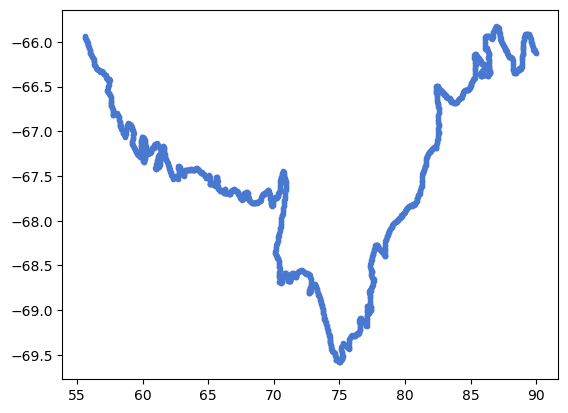

In [118]:
whichCont=1
plt.plot(contour_coordinates_polynya[whichCont][:,0],contour_coordinates_polynya[whichCont][:,1],'.')

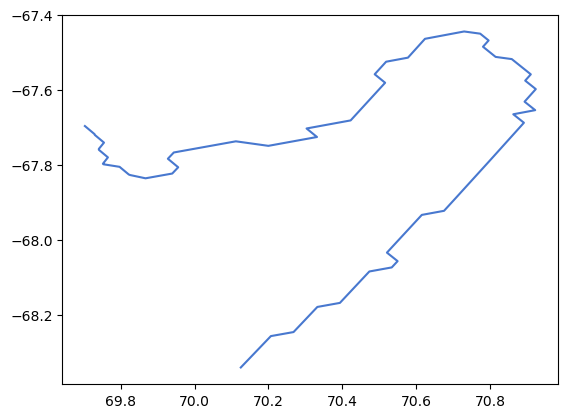

In [123]:
CDpol = contour_coordinates_polynya[1]
CDpol_lon = CDpol[:,0]
CDpol_lat = CDpol[:,1]

remove_these = (((CDpol_lon<69.7) & (CDpol_lat>-68.4))
                | ((CDpol_lon>71))
                | (CDpol_lat<-68.35))
                # | ((CDpol_lon>65.5) & (CDpol_lon<70.6) & (CDpol_lat<-67.55)))

CDpol_lon[remove_these]=np.NaN
CDpol_lat[remove_these]=np.NaN

plt.plot(CDpol_lon,CDpol_lat)


In [124]:
# Save to a .npz file
np.savez('../Data/Raw/CDfastice_coordinates.npz', lon=CDpol_lon, lat=CDpol_lat)